# Topic Model | BAIS:6100

**Instructor: Qihang Lin**

Topic modelling is an unsupervised statistical modelling for discovering unseen/abstract topics that are present in the collection of documents.

For example, a consumer review in Amazon may consist of the following topics:
    
   - Price
   - Shipping
   - Quality
   - Customer service
   - Others
   
Topic modeling can tell the proportion each topic takes in a review, for example, 55% of the review is about price, 20% shipping, 15% quality,  5% customer service, and 5% others. 

## Outputs of Topic Modeling

Putting together the proportions each topic takes in all documents, we obtain a **Document-Topic Matrix**

| Document | Topic 1 | Topic 2 | Topic 3 | Topic 4 | Topic 5 |
| --- | --- | --- | --- | --- | --- |
| Doc1 | 0.55 | 0.20 | 0.15 | 0.05 | 0.05 |
| Doc2 | 0 | 0.10 | 0.80 | 0.10 | 0 |
| Doc3 | 0.60 | 0.10 | 0.10 | 0.10 | 0 |
| ... | ... | ... | ... | ... | ... |

A topic model also estimates the likelihood of seeing each word in each topic, which constitutes a **Term-Topic Matrix**:

| Term | Topic 1 | Topic 2 | Topic 3 | Topic 4 | Topic 5 |
| --- | --- | --- | --- | --- | --- |
| cost | 0.15 | 0.03 | 0.01 | 0.01 | 0.07 |
| call | 0.05 | 0.11 | 0.04 | 0.05 | 0.20 |
| deliver | 0.01 | 0.04 | 0.12 | 0.02 | 0.01|
| delay | 0.02 | 0.06 | 0.02 | 0.30 | 0.08 |
| ... | ... | ... | ... | ... | ... |

## Statistical Topic

A "topic" in topic modeling is slightly different from the "topic" we literally understand: 
   - Topic modeling does not directly output a name for each topic. 
   - In topic modeling, a topic is not identified based on the meaning of text
   - A topic in topic modeling is a "statistical topic", which is essentially **a group of words** that frequently co-occur in the documents. For example:
   
| Topic | Words |
| --- | --- | 
| Topic1 | expensive, pay, high, cost... |
| Topic2 | delay, deliver, slow, wait... |
| Topic3 | fragile, broken, loose, firm... |
| Topic4 | call, rude, responsible, reply... |
| Topic5 | buy, recommend, product... |

A topic model implicitly tells us which words are most associated to each topic through the term-topic matrix. 

We only need to sort the words by their likelihood in each topic, namely, sorting each column of a term-topic matrix. Then we can identify a name for each topic based on the most likely words. For example, we can call Topic 1 "price", Topic 2 "shipping" and so on.   

Cleaning the text can improve results of topic modelling.
   - Co-occurrence frequency increases after stemming.
   - Stop words do not help identify the name of a topic.

## Applications

The applications of topic modeling:

   1. Document vectorization

   2. Information retrieval. For example, find all news about topic "green energy" from data.       
       
   3. Document recommendation. For example, recommend to a user all articles about topic "text mining" 
       
   4. Document clustering
   
   5. Word embedding (same as word vectorization)
   
   6. Word clustering

## Latent Dirichlet Allocation

A Dirichlet distribution can be viewed as a distribution of probability distributions. 

Each row (column) of a document-topic (term-topic) matrix can be viewed as a probability distribution. 

Latent Dirichlet allocation (LDA) model assumes:

   1. **The rows of a document-topic matrix follows a Dirichlet distribution.** 
   2. **The columns of a term-topic matrix also follows a Dirichlet distribution.**

Just like normal distribution, Dirichlet distribution is also a family of distributions with different centers and dispersions.

Suppose there are three topics. In the following picture, each corner of a triangle corresponds to a topic and each dot represents a document with some distribution over topics (a row in the document-topic matrix). 

<img src="https://i.stack.imgur.com/7ZiDs.png">



For details on a Diricichlet distribution, see https://en.wikipedia.org/wiki/Dirichlet_distribution



The LDA model uses an iterative algorithm based on Bayesian statistics to jointly estimate from data:

   - Document-topic matrix
   - Term-topic matrix

How well a LDA model fits the data is measured by **perplexity**. A LDA model with lower perplexity is considered to be good. 

The iterative algorithm in LDA stops when the max number of iterations is reached.

The following GIF image shows how LDA updates the Diricichlet distribution of documents's topics. 

<img src="https://miro.medium.com/max/1050/1*_NdnljMqi8L2_lAYwH3JDQ.gif" width="400">

## Fit a LDA Model

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation  #LDA module from sklearn. 
import nltk                                  
mytexts=["""It starts cool today before warm-up begins over weekend. 
            It starts cool today before warm-up begins over weekend.""",
         
           "It starts cool today before warm-up begins over weekend.",
      
         """It starts cool today before warm-up begins over weekend. 
            As Halloween approaches, cool costumes come out in stores.""",
         
           "As Halloween approaches, cool costumes come out in stores.",
      
         """As Halloween approaches, cool costumes come out in stores. 
            As Halloween approaches, cool costumes come out in stores."""        
      ]   

In [2]:
#Prepare the DTM in term frequencies.
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
vectorizer = StemmedCountVectorizer(stop_words='english')
DTM =vectorizer.fit_transform(mytexts)

In [3]:
#Initialize a LDA vectorizer
lda = LatentDirichletAllocation(n_components=2, #The number of topics 
                                n_jobs=-1,   #Use all processors
                                max_iter=10,   #Reduce it to speed up but compromise on the quality 
                                random_state=2021 #Random seed for reproducing the results.
                               )

In [5]:
#Fit a LDA model from DTM
lda.fit(DTM)

LatentDirichletAllocation(n_components=2, n_jobs=-1, random_state=2021)

In [6]:
#This is the perplexity of the returned LDA model. We will use it to choose the number of topics.
lda.perplexity(DTM)

13.021010318707779

## Term-Topic Matrix

The probability of see each word in each topic is given **lda.components_**, but it is not normalized yet.

In [7]:
DTM.shape

(5, 11)

In [8]:
#Each row of components_ is a topic and each column is a term. 
lda.components_

array([[4.45613613, 0.54385307, 4.45613629, 4.49990423, 4.45613619,
        4.45613621, 0.54385306, 4.45613638, 0.54385299, 0.54385302,
        0.543853  ],
       [0.54386387, 4.45614693, 0.54386371, 4.50009577, 0.54386381,
        0.54386379, 4.45614694, 0.54386362, 4.45614701, 4.45614698,
        4.456147  ]])

We can use L1-norm normalization to convert **components_** to probabilities and obtain the term-topic matrix.

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names())
TTopicM 

/home/abromeland/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1
approach,0.151056,0.018436
begin,0.018436,0.151055
come,0.151056,0.018436
cool,0.152540,0.152545
costum,0.151056,0.018436
halloween,0.151056,0.018436
start,0.018436,0.151055
store,0.151056,0.018436
today,0.018436,0.151055
warm,0.018436,0.151055


In [10]:
#The topic ten words in topic 0
TTopicM.sort_values(by=0,ascending=False).iloc[:10,0]

cool         0.152540
store        0.151056
come         0.151056
halloween    0.151056
costum       0.151056
approach     0.151056
begin        0.018436
start        0.018436
warm         0.018436
weekend      0.018436
Name: 0, dtype: float64

In [11]:
#The topic ten words in topic 1
TTopicM.sort_values(by=1,ascending=False).iloc[:10,1]

cool         0.152545
today        0.151055
weekend      0.151055
warm         0.151055
start        0.151055
begin        0.151055
approach     0.018436
costum       0.018436
halloween    0.018436
come         0.018436
Name: 1, dtype: float64

From the top words, we can call topic 0 "halloween" and topic 1 "weather".

## Document-Topic Matrix

Each row returned by .transform is a document and each column is a topic. 
lda.transform(DTM)

In [12]:
lda.transform(DTM)

array([[0.04100302, 0.95899698],
       [0.07608608, 0.92391392],
       [0.49999758, 0.50000242],
       [0.92391356, 0.07608644],
       [0.95899678, 0.04100322]])

In [13]:
DTopicM = pd.DataFrame(lda.transform(DTM), columns =["halloween","weather"])
DTopicM.head()

,halloween,weather
0,0.041003,0.958997
1,0.076086,0.923914
2,0.499998,0.500002
3,0.923914,0.076086
4,0.958997,0.041003


## Choose Number of Topics 

There is no hard science yielding the best approach for choosing the number of topics. 

A heuristic approach is to use perplexity as a searching criterion. The best number of the topics occurs when the perplexity curve has the "biggest turn". This is also known as the Elbow method.

1
2
3
4
5


Text(0, 0.5, 'Perplexity')

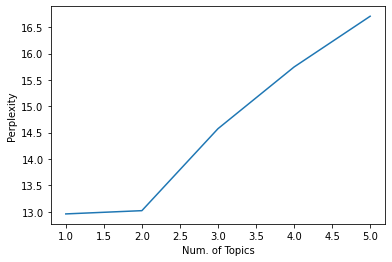

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

num_topics=[1,2,3,4,5]
lda = LatentDirichletAllocation(n_jobs=-1,   
                                max_iter=10,  
                                random_state=2021 
                               )
perplexity=[]
for i in num_topics:
    print(i)
    lda.set_params(n_components=i)
    lda.fit(DTM)
    perplexity.append(lda.perplexity(DTM))

plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')

According to the perplexity curve and the Elbow method, two is the best number of topics, which is consistent with the content of **mytext** above

## Application: Topic Search

Suppose we want to search for the customer complaints in "**CreditCardComplaints.csv**" that are about "monthly payment", "mothly bill", and  "late payment" in general. Instead of using a specific keyword to search over the complaints, we prefer to search for the related topic. 

In [15]:
import pandas as pd
import re
df = pd.read_csv("classdata/CreditCardComplaints.csv")
df

,Company,Consumer.complaint.narrative
0,Wells Fargo & Company,I had been problem with well Fargo Bank I 'm h...
1,Wells Fargo & Company,Complaint Against : Wells Fargo Financial Nati...
2,Wells Fargo & Company,I wanted to know what interest rate might be t...
3,Wells Fargo & Company,Approximately two years ago I opened up a secu...
4,Wells Fargo & Company,"Wells Fargo informed me that they made a "" bus..."
...,...,...
2142,Capital One,I was out of work for about 6 months. after co...
2143,Capital One,"Six times since XXXX XXXX, 2016, I have receiv..."
2144,Capital One,My XXXX credit cards issued by capital one was...
2145,Capital One,I was shocked when I reviewed my credit report...


In [16]:
df["Consumer.complaint.narrative"][1]

'Complaint Against : Wells Fargo Financial National BankI was charged a {$25.00} late fee on a {$500.00} remaining balance for paying {$120.00} well ahead of the due date but not covering the full " minimum \'\' payment of approximately {$190.00}. When I explained the details of the situation, they did not acknowledge the best effort I made to be current and refused to waive the fees since in their determination it was not a Wells Fargo Error. The fee is unfair, and their choice to not waive the fee was a horrible busines practice and abusive in nature as it rested on " There is no beneift to us having to waive the fee \'\' Bankground Details : In XX/XX/XXXX I purchased a hot tup and took advantage of a dealer finance option that used a Wells Fargo Outdoor Solution credit card to provide XXXX months interest free financing. The total amount financed was approximately {$5500.00}. On XXXX I paid XXXX, on XX/XX/XXXX I paid {$2500.00} and knew there was a {$500.00} remaining balance. Given

In [17]:
#Load and clean data
import pandas as pd
import re
df = pd.read_csv("classdata/CreditCardComplaints.csv")
df['Consumer.complaint.narrative']=[re.sub("\{\$\d+[\d,\.]*\}", "moneytoken", s) for s in df['Consumer.complaint.narrative']]
df['Consumer.complaint.narrative']=[re.sub("X+", " ", s) for s in df['Consumer.complaint.narrative']]

#Create DTM
import nltk  
nltk_stopwords = nltk.corpus.stopwords.words("english") 
nltk_stopwords=nltk_stopwords+["wells","fargo","capital","one"]
vectorizer = StemmedCountVectorizer(stop_words=nltk_stopwords, 
                                    max_features=1000    #Limiting the number of terms speeds up LDA
                                   )
DTM =vectorizer.fit_transform(df['Consumer.complaint.narrative']) 
DTM.shape

(2147, 1000)

Use the Elbow method mentioned above to decide the number of topics.

3
4
5
6


Text(0, 0.5, 'Perplexity')

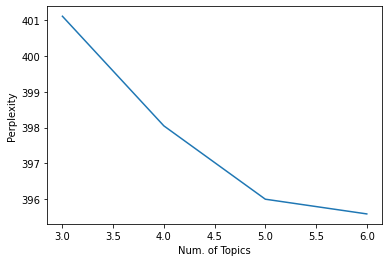

In [18]:
lda = LatentDirichletAllocation(n_jobs=-1,   
                                max_iter=20,   
                                random_state=2021 
                               )

num_topics=[3,4,5,6]
perplexity=[]
for i in num_topics:
    print(i)
    lda.set_params(n_components=i)
    lda.fit(DTM)
    perplexity.append(lda.perplexity(DTM))


plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')

Fit a LDA model with 5 topics.

In [19]:
lda = LatentDirichletAllocation(n_components=5,
                                n_jobs=-1,   
                                max_iter=20,   
                                random_state=2021 
                               )
lda.fit(DTM)

LatentDirichletAllocation(max_iter=20, n_components=5, n_jobs=-1,
                          random_state=2021)

In [20]:
#Create the top words for each topic and put them together in the same data frame.
temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names())
TermOfTopic =pd.DataFrame([])
for i in range(5):
    TermOfTopic[i]=(list(TTopicM.sort_values(by=i,ascending=False).iloc[:10,i].index))
TermOfTopic

/home/abromeland/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4
0,card,credit,payment,credit,card
1,interest,account,late,account,call
2,credit,report,due,inform,told
3,moneytoken,card,fee,card,would
4,balanc,close,month,letter,account
5,rate,balanc,bill,provid,time
6,month,remov,statement,charg,credit
7,would,moneytoken,made,receiv,back
8,offer,paid,pay,request,moneytoken
9,fee,payment,moneytoken,disput,said


Which topic is most related to "monthly payment", "mothly bill", and "late payment"?

   - Topic 2

The document-topic matrix tells us the distribution of topics, in particular, the percentage of each customer complaint about Topic 2. 

In [21]:
df.head()

,Company,Consumer.complaint.narrative
0,Wells Fargo & Company,I had been problem with well Fargo Bank I 'm h...
1,Wells Fargo & Company,Complaint Against : Wells Fargo Financial Nati...
2,Wells Fargo & Company,I wanted to know what interest rate might be t...
3,Wells Fargo & Company,Approximately two years ago I opened up a secu...
4,Wells Fargo & Company,"Wells Fargo informed me that they made a "" bus..."


In [22]:
DTopicM = pd.DataFrame(lda.transform(DTM))
DTopicM.head()

,0,1,2,3,4
0,0.006209,0.095508,0.132560,0.006256,0.759468
1,0.527251,0.000788,0.351029,0.120141,0.000790
2,0.206318,0.003046,0.003034,0.301068,0.486534
3,0.001451,0.275751,0.085107,0.053299,0.584391
4,0.586218,0.000759,0.052011,0.360264,0.000749


In [23]:
#Concatenate df and DTopicM horizontally.
dfnew = pd.concat([df, DTopicM], axis=1)
dfnew.head()

,Company,Consumer.complaint.narrative,0,1,2,3,4
0,Wells Fargo & Company,I had been problem with well Fargo Bank I 'm h...,0.006209,0.095508,0.132560,0.006256,0.759468
1,Wells Fargo & Company,Complaint Against : Wells Fargo Financial Nati...,0.527251,0.000788,0.351029,0.120141,0.000790
2,Wells Fargo & Company,I wanted to know what interest rate might be t...,0.206318,0.003046,0.003034,0.301068,0.486534
3,Wells Fargo & Company,Approximately two years ago I opened up a secu...,0.001451,0.275751,0.085107,0.053299,0.584391
4,Wells Fargo & Company,"Wells Fargo informed me that they made a "" bus...",0.586218,0.000759,0.052011,0.360264,0.000749


In [24]:
#Sort the complaints based on their weight on Topic 2 
dfnew.sort_values(by=2,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(5)

,Company,Consumer.complaint.narrative,0,1,2,3,4
0,Wells Fargo & Company,I have my credit card payment on a weekly pay ...,0.002408,0.002370,0.990362,0.002472,0.002387
1,Wells Fargo & Company,"On more than a half dozen occasions, Wells Far...",0.002420,0.002425,0.990267,0.002468,0.002419
2,Capital One,"On occasions in the past 12 months, I / we h...",0.003552,0.003436,0.986065,0.003480,0.003466
3,Capital One,I have a Neiman Marcus credit card. There have...,0.003612,0.003648,0.985456,0.003664,0.003620
4,Capital One,"On , 2015, I went on Capital One site to lo...",0.005675,0.005690,0.977188,0.005610,0.005836


In [25]:
dfnew['Consumer.complaint.narrative'][0]

'I have my credit card payment on a weekly pay cycle of $  /week. During the course of a month ( 4 weeks or 28 days ) I make a cumulative monthly payment of moneytoken. My minimum monthly payment due on my credit card was moneytoken, due on    , 2015. \r\nI was charged a moneytoken late fee on my   billing due to the timing of the billing cycle and the corresponding payments. \r\nMy due date each month is on the  , but my cycle does not end until the  . During the month of   I had a payment applied on the  , which is between the   and  . \r\nThe application of the     payment was applied backwards, to my   payment requirement. The resulting billing period for     through my due date     only had 3 weeks ( 23 days ) to make my payment. My payments were made each week on  ,  ,  . \r\nThe     payment should have been my   payment, which would have been 4 weeks ( 30 days ). \r\nI did contact the company and talked to a supervisor. The supervisor did state and confirmed that I was being cha

In [26]:
dfnew['Consumer.complaint.narrative'][33]

'Wells Fargo is charging excessive late fees \r\n'